In [ ]:
install.packages("readr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readr)

In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”


In [ ]:
library(dplyr)

In [ ]:

places <- read_csv("https://chronicdata.cdc.gov/api/views/cwsq-ngmh/rows.csv?accessType=DOWNLOAD") # PLACES (tract)
mdi <- places |> filter(Measure == "Frequent mental distress") |>
  select(StateAbbr = StateAbbr, CountyName, LocationName, TractFIPS = LocationID, Value)

svi <- read_csv("https://www.atsdr.cdc.gov/placeandhealth/svi_data/documents/SVI2022_US_tract.csv")
mdi_svi <- mdi |> inner_join(svi, by = c("TractFIPS" = "FIPS"))


# Mental Health impacted by Social Media Consumption Dataset Set up

In [ ]:
library(readr)
path <- "/content/digital_habits_vs_mental_health.csv"
stopifnot(file.exists(path))
df <- read_csv(path, show_col_types = FALSE)
dim(df)
head(df)


[1] 100000      6

screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.3,2,5.3,4.4,10,5
6.5,5,3.5,6.2,8,8
9.1,4,2.8,6.6,7,8
6.5,3,2.5,6.5,7,9
2.1,3,1.2,7.8,2,10
5.5,5,1.8,3.4,10,5


In [ ]:
str(df)

spc_tbl_ [100,000 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ screen_time_hours          : num [1:100000] 10.3 6.5 9.1 6.5 2.1 5.5 4.7 3 6 4.5 ...
 $ social_media_platforms_used: num [1:100000] 2 5 4 3 3 5 5 5 2 3 ...
 $ hours_on_TikTok            : num [1:100000] 5.3 3.5 2.8 2.5 1.2 1.8 1 1.6 3.1 2.6 ...
 $ sleep_hours                : num [1:100000] 4.4 6.2 6.6 6.5 7.8 3.4 4.7 6.8 7.5 7.8 ...
 $ stress_level               : num [1:100000] 10 8 7 7 2 10 9 6 5 7 ...
 $ mood_score                 : num [1:100000] 5 8 8 9 10 5 9 10 10 10 ...
 - attr(*, "spec")=
  .. cols(
  ..   screen_time_hours = col_double(),
  ..   social_media_platforms_used = col_double(),
  ..   hours_on_TikTok = col_double(),
  ..   sleep_hours = col_double(),
  ..   stress_level = col_double(),
  ..   mood_score = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [ ]:
dim(df)

[1] 100000      6

In [ ]:
nrow(df)

[1] 100000

# Set Up for Both Datasets

Dataset 1: Mental Health Care in past Times
Dataset 2: Media Consumption affect on Mental Health

In [ ]:
install.packages(c(
  "tidyverse","janitor","GGally","broom","patchwork",
  "splines","scales","gt"
))
library(tidyverse); library(janitor); library(GGally); library(broom)
library(patchwork); library(splines); library(scales); library(gt)

# helpful theme
theme_set(theme_minimal(base_size = 12))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘splines’ is a base package, and should not be updated”
also installing the dependencies ‘V8’, ‘litedown’, ‘reactR’, ‘snakecase’, ‘ggstats’, ‘S7’, ‘bigD’, ‘bitops’, ‘juicyjuice’, ‘markdown’, ‘reactable’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

# 1) Load & clean both datasets

In [ ]:
# A) Your Gen Z dataset (already in memory; standardize names)
df <- df |> janitor::clean_names()  # hours_on_TikTok -> hours_on_tik_tok
glimpse(df)

# B) Household Pulse
mhcare <- read_csv("/content/Mental_Health_Care_in_the_Last_4_Weeks.csv") |>
  clean_names() |>
  mutate(
    indicator = str_squish(indicator),
    group     = str_squish(group),
    state     = str_squish(state),
    subgroup  = str_squish(subgroup),
    # parse dates safely
    time_period_start_date = suppressWarnings(mdy(time_period_start_date)),
    time_period_end_date   = suppressWarnings(mdy(time_period_end_date))
  )

glimpse(mhcare)


Rows: 100,000
Columns: 6
$ screen_time_hours           <dbl> 10.3, 6.5, 9.1, 6.5, 2.1, 5.5, 4.7, 3.0, 6…
$ social_media_platforms_used <dbl> 2, 5, 4, 3, 3, 5, 5, 5, 2, 3, 4, 1, 3, 4, …
$ hours_on_tik_tok            <dbl> 5.3, 3.5, 2.8, 2.5, 1.2, 1.8, 1.0, 1.6, 3.…
$ sleep_hours                 <dbl> 4.4, 6.2, 6.6, 6.5, 7.8, 3.4, 4.7, 6.8, 7.…
$ stress_level                <dbl> 10, 8, 7, 7, 2, 10, 9, 6, 5, 7, 7, 8, 9, 9…
$ mood_score                  <dbl> 5, 8, 8, 9, 10, 5, 9, 10, 10, 10, 7, 8, 8,…


Rows: 10404 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Indicator, Group, State, Subgroup, Phase, Time Period Label, Time ...
dbl  (5): Time Period, Value, LowCI, HighCI, Suppression Flag

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 10,404
Columns: 15
$ indicator              <chr> "Received Counseling or Therapy, Last 4 Weeks",…
$ group                  <chr> "By Sex", "By Sex", "By Sex", "By Age", "By Age…
$ state                  <chr> "United States", "United States", "United State…
$ subgroup               <chr> "Male", "Female", "Female", "50 - 59 years", "6…
$ phase                  <chr> "2", "2", "-1", "-1", "-1", "-1", "-1", "-1", "…
$ time_period            <dbl> 15, 15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 13…
$ time_period_label      <chr> "Sep 16 - Sep 28, 2020", "Sep 16 - Sep 28, 2020…
$ time_period_start_date <date> 2020-09-16, 2020-09-16, 2020-12-22, 2021-03-30…
$ time_period_end_date   <date> 2020-09-28, 2020-09-28, 2021-01-05, 2021-04-13…
$ value                  <dbl> 6.9, 11.0, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ low_ci                 <dbl> 6.5, 10.4, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ high_ci                <dbl> 7.3, 11.6, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ confidence_in

In [ ]:
head(mhcare)

indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,low_ci,high_ci,confidence_interval,quartile_range,suppression_flag
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<date>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Male,2,15,"Sep 16 - Sep 28, 2020",2020-09-16,2020-09-28,6.9,6.5,7.3,6.5 - 7.3,NA,NA
"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Female,2,15,"Sep 16 - Sep 28, 2020",2020-09-16,2020-09-28,11.0,10.4,11.6,10.4 - 11.6,NA,NA
"Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks",By Sex,United States,Female,-1,1,"Dec 22, 2020 - Jan 5, 2021",2020-12-22,2021-01-05,NA,NA,NA,NA,NA,NA
"Took Prescription Medication for Mental Health, Last 4 Weeks",By Age,United States,50 - 59 years,-1,1,"Mar 30 - Apr 13, 2021",2021-03-30,2021-04-13,NA,NA,NA,NA,NA,NA
"Took Prescription Medication for Mental Health, Last 4 Weeks",By Age,United States,60 - 69 years,-1,1,"Mar 30 - Apr 13, 2021",2021-03-30,2021-04-13,NA,NA,NA,NA,NA,NA
"Took Prescription Medication for Mental Health, Last 4 Weeks",By Age,United States,70 - 79 years,-1,1,"Mar 30 - Apr 13, 2021",2021-03-30,2021-04-13,NA,NA,NA,NA,NA,NA


# 2) See what’s in mhcare (pick usable slices)


In [ ]:
# What indicators exist?
mhcare |> count(indicator, sort = TRUE) |> print(n = 20)

# What age labels look like?
mhcare |> filter(group == "By Age") |> count(subgroup, sort = TRUE)

# Quick peek at "Received Counseling..." by Age (United States only)
mhcare |>
  filter(state == "United States", group == "By Age",
         str_detect(indicator, "Received Counseling|Therapy")) |>
  arrange(time_period_end_date) |>
  select(time_period_label, time_period_end_date, subgroup, value) |>
  slice_head(n = 12)


# A tibble: 4 × 2
  indicator                                                                    n
  <chr>                                                                    <int>
1 Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks             2601
2 Received Counseling or Therapy, Last 4 Weeks                              2601
3 Took Prescription Medication for Mental Health And/Or Received Counseli…  2601
4 Took Prescription Medication for Mental Health, Last 4 Weeks              2601


subgroup,n
<chr>,<int>
18 - 29 years,152
30 - 39 years,152
40 - 49 years,152
50 - 59 years,152
60 - 69 years,152
70 - 79 years,152
80 years and above,152


time_period_label,time_period_end_date,subgroup,value
<chr>,<date>,<chr>,<dbl>
"Aug 19 - Aug 31, 2020",2020-08-31,18 - 29 years,12.2
"Aug 19 - Aug 31, 2020",2020-08-31,30 - 39 years,11.7
"Aug 19 - Aug 31, 2020",2020-08-31,40 - 49 years,10.0
"Aug 19 - Aug 31, 2020",2020-08-31,50 - 59 years,8.4
"Aug 19 - Aug 31, 2020",2020-08-31,60 - 69 years,5.4
"Aug 19 - Aug 31, 2020",2020-08-31,70 - 79 years,4.1
"Aug 19 - Aug 31, 2020",2020-08-31,80 years and above,3.0
"Aug 19 - Aug 31, 2020",2020-08-31,18 - 29 years,23.3
"Aug 19 - Aug 31, 2020",2020-08-31,30 - 39 years,23.1



# 3) Build a clean “Gen Z care” time series from mhcare

In [ ]:
age_pat <- regex("^\\s*1?8\\s*[-–to]{1,3}\\s*24", ignore_case = TRUE)

mh_gz <- mhcare |>
  filter(state == "United States", group == "By Age",
         str_detect(subgroup %||% "", age_pat),
         indicator %in% c(
           "Received Counseling or Therapy, Last 4 Weeks",
           "Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks"
         )) |>
  filter(!is.na(value), !is.na(time_period_end_date)) |>
  arrange(time_period_end_date) |>
  mutate(indicator = recode(indicator,
    "Received Counseling or Therapy, Last 4 Weeks" = "Received counseling/therapy",
    "Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks" = "Needed care but didn’t get it"
  ))

# If nothing returns (no 18–24), fall back to By Sex (United States)
if(nrow(mh_gz) == 0){
  mh_gz <- mhcare |>
    filter(state == "United States", group == "By Sex",
           indicator %in% c(
             "Received Counseling or Therapy, Last 4 Weeks",
             "Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks"
           ),
           !is.na(value), !is.na(time_period_end_date)) |>
    arrange(time_period_end_date) |>
    mutate(indicator = recode(indicator,
      "Received Counseling or Therapy, Last 4 Weeks" = "Received counseling/therapy",
      "Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks" = "Needed care but didn’t get it"
    ))
}


# 4) EDA on your Gen Z dataset (Dataset A)

ERROR while rich displaying an object: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 1, 0, 10

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .       

<div id="czqexrrgwp" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#czqexrrgwp table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#czqexrrgwp thead, #czqexrrgwp tbody, #czqexrrgwp tfoot, #czqexrrgwp tr, #czqexrrgwp td, #czqexrrgwp th {
  border-style: none;
}

#czqexrrgwp p {
  margin: 0;
  padding: 0;
}

#czqexrrgwp .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  b

n,screen_time_hours_mean,screen_time_hours_sd,screen_time_hours_min,screen_time_hours_max,social_media_platforms_used_mean,social_media_platforms_used_sd,social_media_platforms_used_min,social_media_platforms_used_max,hours_on_tik_tok_mean,⋯,stress_level_min,stress_level_max,mood_score_mean,mood_score_sd,mood_score_min,mood_score_max,n_mean,n_sd,n_min,n_max
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
100000,6.003505,1.987073,1,12,2.99782,1.414452,1,5,2.401433,⋯,1,10,9.06076,1.27847,2,10,1e+05,NA,100000,100000


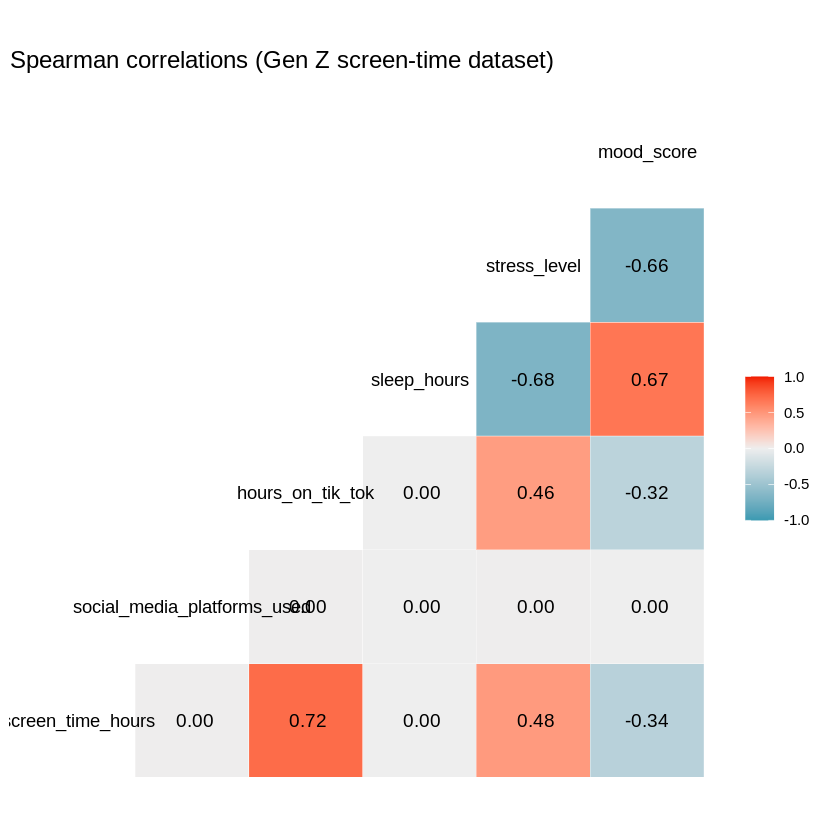

In [ ]:
# Quick summary
df |> slice_head(n = 6) |> gt()

summary_df <- df |>
  summarise(n = n(),
            across(everything(), list(mean = ~mean(.x, na.rm=TRUE),
                                      sd   = ~sd(.x, na.rm=TRUE),
                                      min  = ~min(.x, na.rm=TRUE),
                                      max  = ~max(.x, na.rm=TRUE))))
summary_df

# Correlation heatmap (Spearman handles nonlinearity)
num_cols <- df |> select(where(is.numeric))
ggcorr(num_cols, method = c("everything","spearman"), label = TRUE, label_round = 2) +
  labs(title = "Spearman correlations (Gen Z screen-time dataset)")


# Focused bivariate patterns:

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Failed to fit group -1.
Caused by error in `predLoess()`:
! workspace required (15001075050) is too large probably because of setting 'se = TRUE'.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Failed to fit group -1.
Caused by error in `predLoess()`:
! workspace required (15001075050) is too large probably because of setting 'se = TRUE'.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Failed to fit group -1.
Caused by error in `predLoess()`:
! workspace required (15001075050) is too large probably because of setting 'se = TRUE'.”


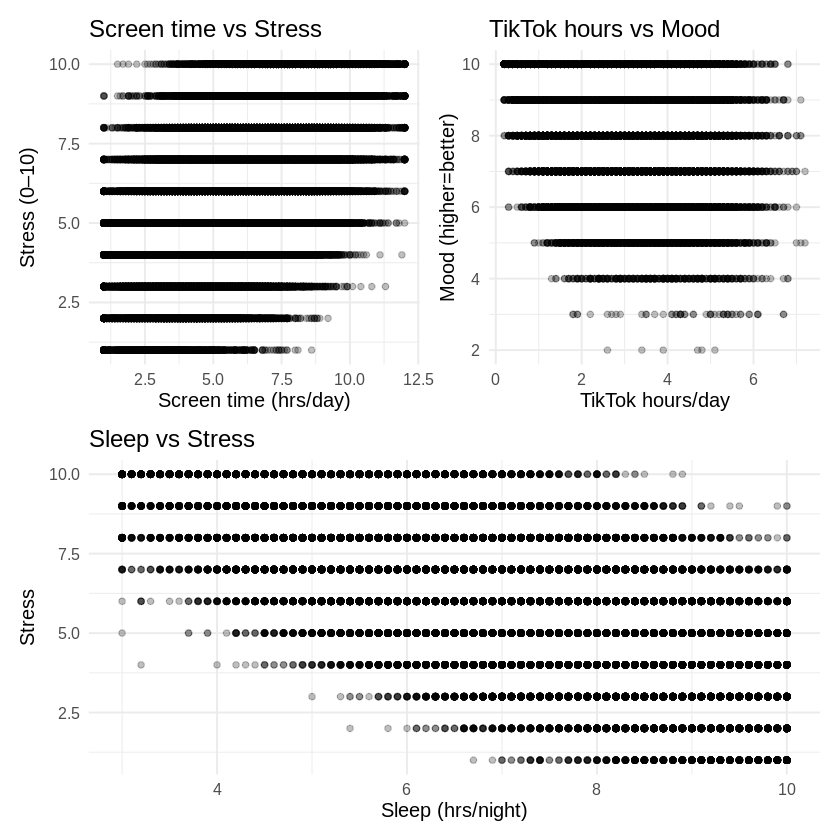

In [ ]:
p_st <- ggplot(df, aes(screen_time_hours, stress_level)) +
  geom_point(alpha = 0.25) +
  geom_smooth(method = "loess", se = TRUE) +
  labs(title = "Screen time vs Stress", x = "Screen time (hrs/day)", y = "Stress (0–10)")

p_tm <- ggplot(df, aes(hours_on_tik_tok, mood_score)) +
  geom_point(alpha = 0.25) +
  geom_smooth(method = "loess", se = TRUE) +
  labs(title = "TikTok hours vs Mood", x = "TikTok hours/day", y = "Mood (higher=better)")

p_sl <- ggplot(df, aes(sleep_hours, stress_level)) +
  geom_point(alpha = 0.25) +
  geom_smooth(method = "loess", se = TRUE) +
  labs(title = "Sleep vs Stress", x = "Sleep (hrs/night)", y = "Stress")

(p_st + p_tm) / p_sl


# 5) Adjusted associations (partial effects)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.7503548,0.7503423,1.022004,60110.08,0,5,-144067.4,288148.9,288215.4,104443,99994,100000


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5747422,0.5747209,0.8337338,27028.67,0,5,-123706.7,247427.5,247494.1,69507.04,99994,100000


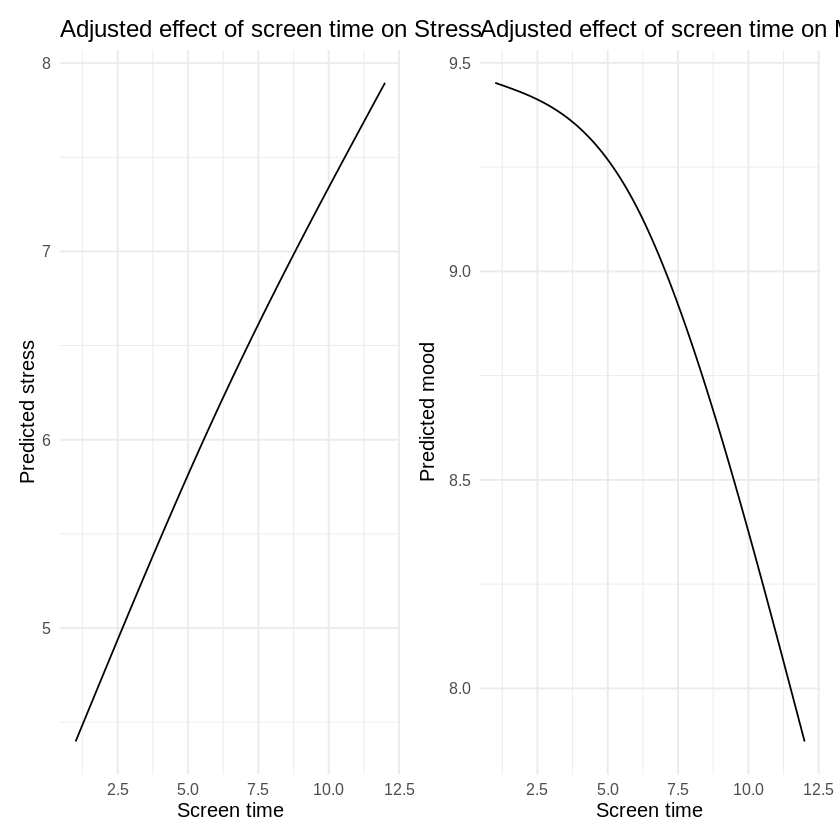

In [ ]:
m_stress <- lm(stress_level ~ ns(screen_time_hours, 2) + sleep_hours +
                 hours_on_tik_tok + social_media_platforms_used, data = df)

m_mood <- lm(mood_score ~ ns(screen_time_hours, 2) + sleep_hours +
               hours_on_tik_tok + social_media_platforms_used, data = df)

glance(m_stress); glance(m_mood)   # R^2 etc.

# Plot predicted stress/mood vs screen time at typical values
newdat <- tibble(
  screen_time_hours = seq(min(df$screen_time_hours, na.rm=TRUE),
                          max(df$screen_time_hours, na.rm=TRUE), length.out = 100),
  sleep_hours = median(df$sleep_hours, na.rm=TRUE),
  hours_on_tik_tok = median(df$hours_on_tik_tok, na.rm=TRUE),
  social_media_platforms_used = median(df$social_media_platforms_used, na.rm=TRUE)
)
pred_stress <- augment(m_stress, newdata = newdat)
pred_mood   <- augment(m_mood, newdata = newdat)

p_adj_stress <- ggplot(pred_stress, aes(screen_time_hours, .fitted)) +
  geom_line() +
  labs(title="Adjusted effect of screen time on Stress", x="Screen time", y="Predicted stress")

p_adj_mood <- ggplot(pred_mood, aes(screen_time_hours, .fitted)) +
  geom_line() +
  labs(title="Adjusted effect of screen time on Mood", x="Screen time", y="Predicted mood")

p_adj_stress + p_adj_mood


# Optional: Does sleep buffer the screen-time → stress link?

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,99994,104443,NA,NA,NA,NA
2,99992,103911,2,532.054,255.9939,1.279146e-111


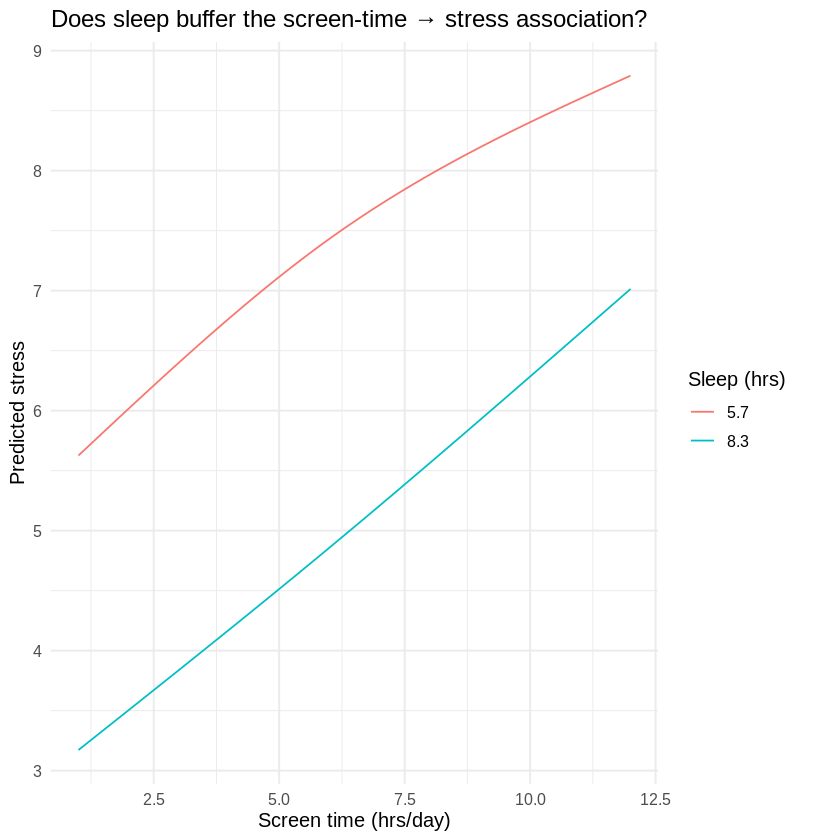

In [ ]:
m_stress_int <- lm(stress_level ~ ns(screen_time_hours, 2)*sleep_hours +
                     hours_on_tik_tok + social_media_platforms_used, data = df)
anova(m_stress, m_stress_int)  # if p<.05, keep interaction

q <- quantile(df$sleep_hours, c(.2,.8), na.rm = TRUE)
newdat2 <- crossing(
  screen_time_hours = seq(min(df$screen_time_hours, na.rm=TRUE),
                          max(df$screen_time_hours, na.rm=TRUE), length.out = 120),
  sleep_hours = c(q[1], q[2]),
  hours_on_tik_tok = median(df$hours_on_tik_tok, na.rm=TRUE),
  social_media_platforms_used = median(df$social_media_platforms_used, na.rm=TRUE)
)
pred_int <- augment(m_stress_int, newdata = newdat2)

p_buffer <- ggplot(pred_int, aes(screen_time_hours, .fitted, color = factor(round(sleep_hours,1)))) +
  geom_line() +
  labs(title="Does sleep buffer the screen-time → stress association?",
       x="Screen time (hrs/day)", y="Predicted stress", color="Sleep (hrs)")
p_buffer


# 6) Build the context chart from mhcare

## A) Time series for 18–24 (or By Sex fallback)

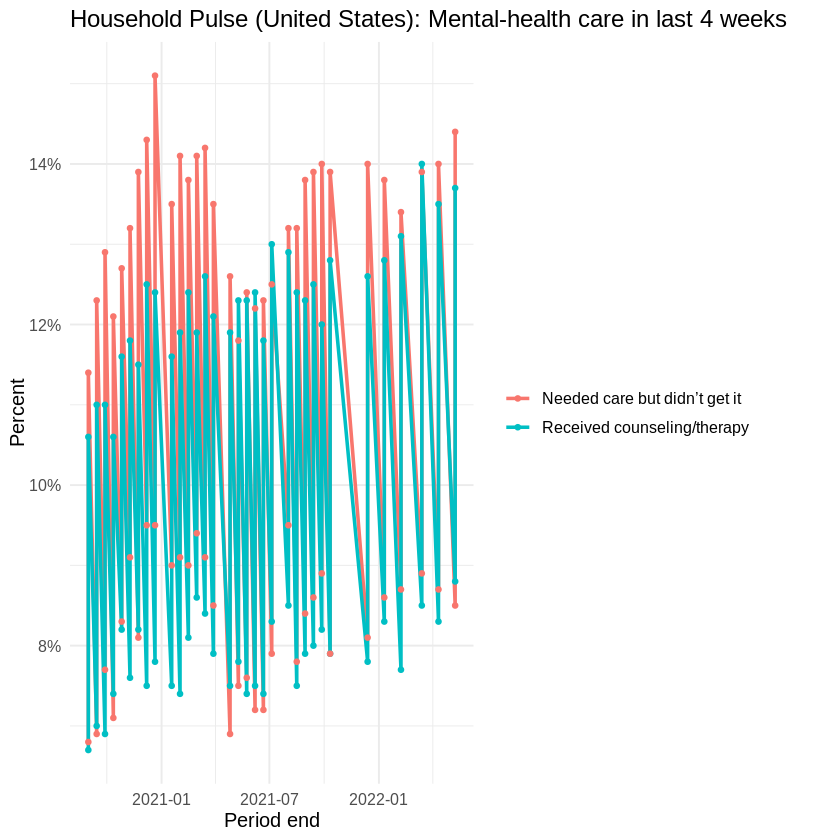

In [ ]:
p_hps_ts <- ggplot(mh_gz, aes(time_period_end_date, value, color = indicator)) +
  geom_line(linewidth = 1) +
  geom_point(size = 1.2) +
  scale_y_continuous(labels = label_percent(accuracy = 1, scale = 1)) +
  labs(title = "Household Pulse (United States): Mental-health care in last 4 weeks",
       x = "Period end", y = "Percent", color = NULL)
p_hps_ts


## B) Latest period by subgroup (bar)

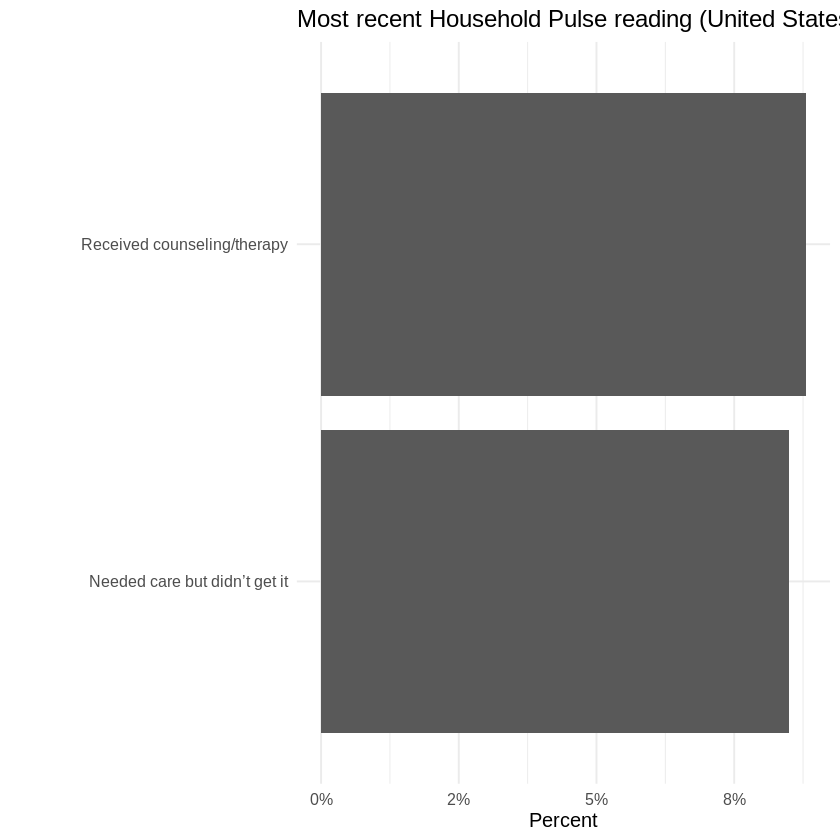

In [ ]:
mh_latest <- mh_gz |>
  group_by(indicator) |>
  slice_max(order_by = time_period_end_date, n = 1, with_ties = FALSE) |>
  ungroup()

p_hps_latest <- ggplot(mh_latest, aes(value, indicator)) +
  geom_col() +
  scale_x_continuous(labels = label_percent(accuracy = 1, scale = 1)) +
  labs(title = "Most recent Household Pulse reading (United States, Gen Z slice)",
       x = "Percent", y = NULL)
p_hps_latest


# 7) Put it together (perfect for a LinkedIn visual)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Failed to fit group -1.
Caused by error in `predLoess()`:
! workspace required (15001075050) is too large probably because of setting 'se = TRUE'.”


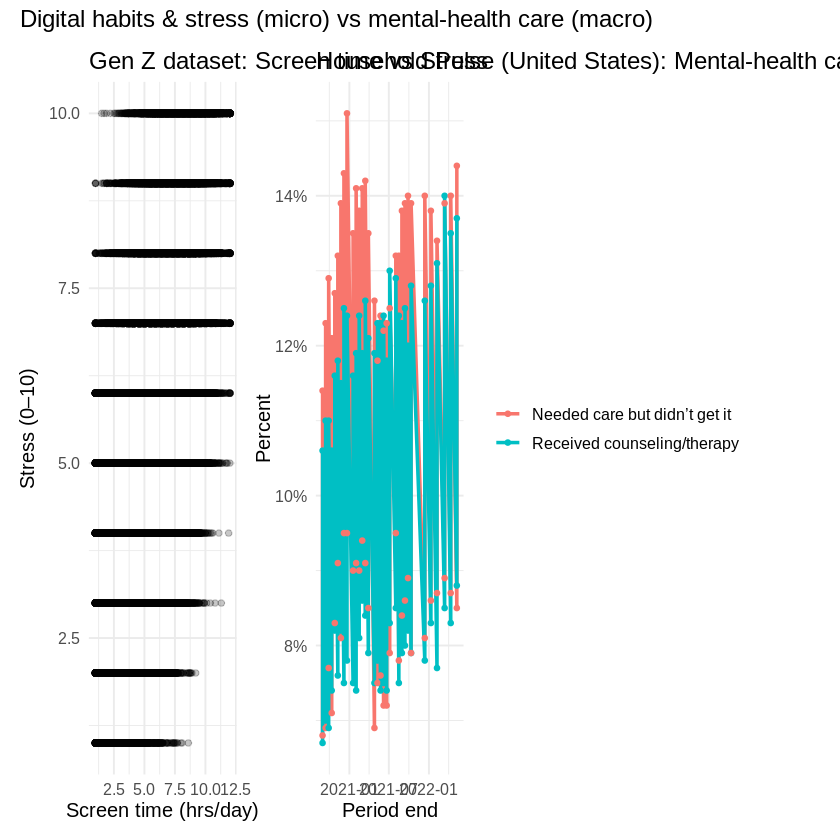

In [ ]:
p_left  <- ggplot(df, aes(screen_time_hours, stress_level)) +
  geom_point(alpha = 0.22) +
  geom_smooth(method = "loess", se = TRUE) +
  labs(title = "Gen Z dataset: Screen time vs Stress",
       x = "Screen time (hrs/day)", y = "Stress (0–10)")

p_right <- p_hps_ts  # or p_hps_latest

(p_left | p_right) + plot_annotation(title = "Digital habits & stress (micro) vs mental-health care (macro)")


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Failed to fit group -1.
Caused by error in `predLoess()`:
! workspace required (15001075050) is too large probably because of setting 'se = TRUE'.”


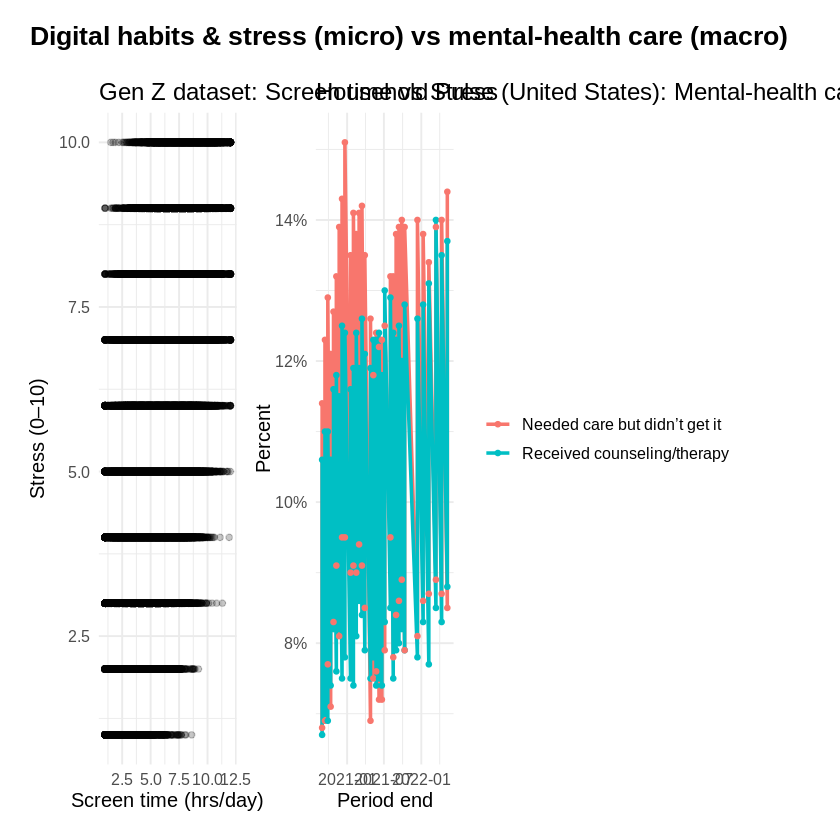

In [ ]:
library(patchwork)
title_txt <- "Digital habits & stress (micro) vs mental-health care (macro)"

combined <- (p_left | p_right) +
  plot_annotation(
    title = title_txt,
    theme = theme(
      plot.title = element_text(size = 16, face = "bold", hjust = 0,
                                margin = margin(b = 14)),
      plot.margin = margin(t = 16, r = 12, b = 12, l = 12)
    )
  )

combined  # print in notebook


In [ ]:
title_txt <- "Digital habits & stress (micro)\nvs mental-health care (macro)"
combined <- (p_left | p_right) + plot_annotation(title = title_txt)


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Failed to fit group -1.
Caused by error in `predLoess()`:
! workspace required (15001075050) is too large probably because of setting 'se = TRUE'.”


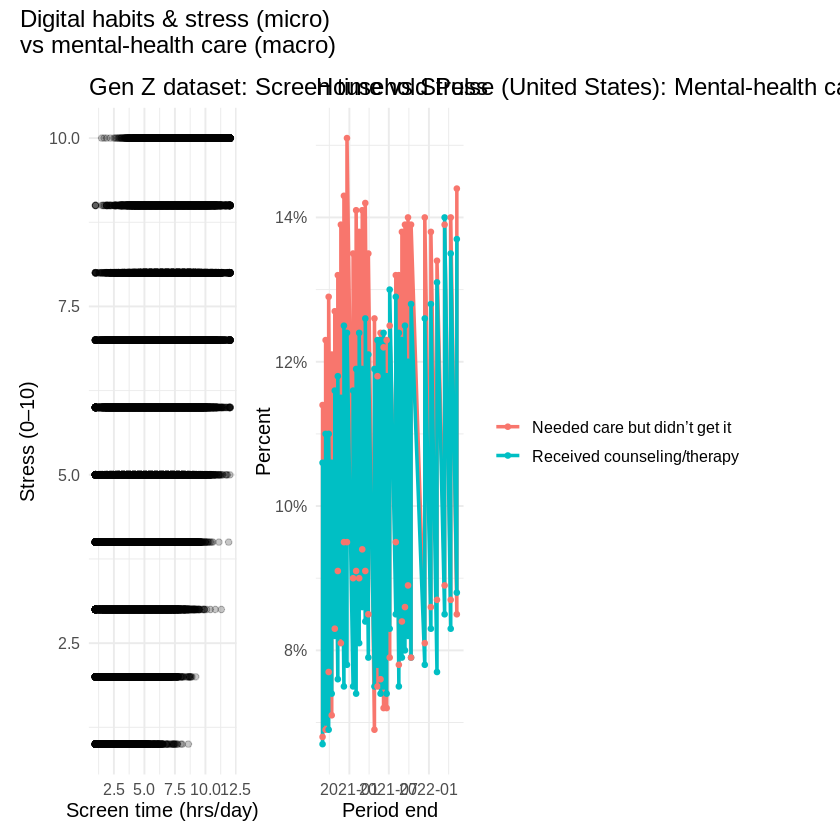

In [ ]:
combined

In [ ]:
dir.create("figs", showWarnings = FALSE)
dir.create("outputs", showWarnings = FALSE)

ggsave("figs/01_screentime_stress.png", p_left, width=6.5, height=4.5, dpi=300)
ggsave("figs/02_hps_timeseries.png", p_hps_ts, width=7.5, height=4.5, dpi=300)

tidy(m_stress)  |> write_csv("outputs/model_stress_tidy.csv")
glance(m_stress)|> write_csv("outputs/model_stress_glance.csv")


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Failed to fit group -1.
Caused by error in `predLoess()`:
! workspace required (15001075050) is too large probably because of setting 'se = TRUE'.”


In [ ]:
install.packages("insight")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(insight)

In [ ]:
insight::print_color("The next section will be another part of the Project\n", "blue")


The next section will be another part of the Project


## Next Section for another Part of Project (Part 2)

# Move Next

# Next Page for Code

## Load Libraries

In [2]:
install.packages("readr")

install.packages("dplyr")

install.packages("tidyr")

install.packages("janitor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’




In [3]:
library(readr); library(dplyr); library(tidyr); library(janitor)



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Load Dataset

In [5]:
path <- "/content/Sleep_vs_Stress_Strong_Correlation.csv"
df <- read_csv(path)


Rows: 100 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): Sleep Hours (per night), Stress Level (1–10)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
head(df)

Sleep Hours (per night),Stress Level (1–10)
<dbl>,<dbl>
6.83,3.53
9.47,1.72
7.34,3.16
8.60,2.74
6.81,4.29
6.92,4.27


In [7]:
glimpse(df)

Rows: 100
Columns: 2
$ `Sleep Hours (per night)` <dbl> 6.83, 9.47, 7.34, 8.60, 6.81, 6.92, 7.91, 7.…
$ `Stress Level (1–10)`     <dbl> 3.53, 1.72, 3.16, 2.74, 4.29, 4.27, 3.35, 3.…


## 🔹 1. Explore the Dataset

EDA and Summary Statistics

In [8]:
# Summary statistics
summary(df)

# Correlation
cor(df$`Sleep Hours (per night)`, df$`Stress Level (1–10)`)

# Rename columns for easier handling
df <- df %>% rename(Sleep = `Sleep Hours (per night)`,
                    Stress = `Stress Level (1–10)`)



 Sleep Hours (per night) Stress Level (1–10)
 Min.   : 4.000          Min.   :1.270      
 1st Qu.: 6.393          1st Qu.:2.938      
 Median : 7.035          Median :3.580      
 Mean   : 7.069          Mean   :3.632      
 3rd Qu.: 7.888          3rd Qu.:4.290      
 Max.   :10.000          Max.   :6.560      

[1] -0.959213

## 🔹 2. Visualize the Relationship

Use scatterplots + smoothing to test for linear vs non-linear trends.

In [9]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library(ggplot2)


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


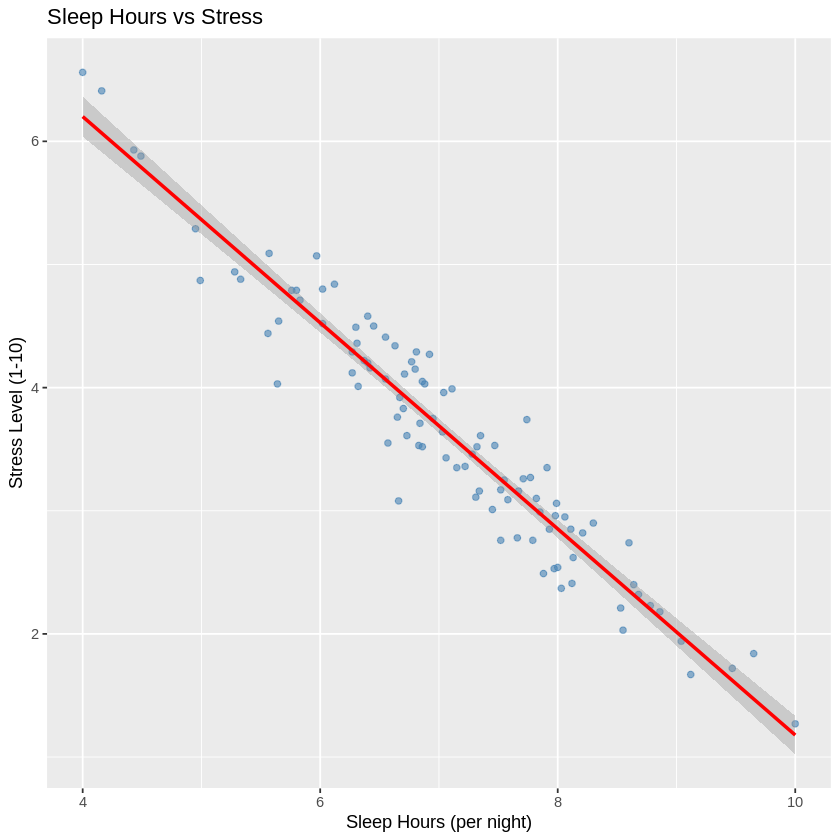

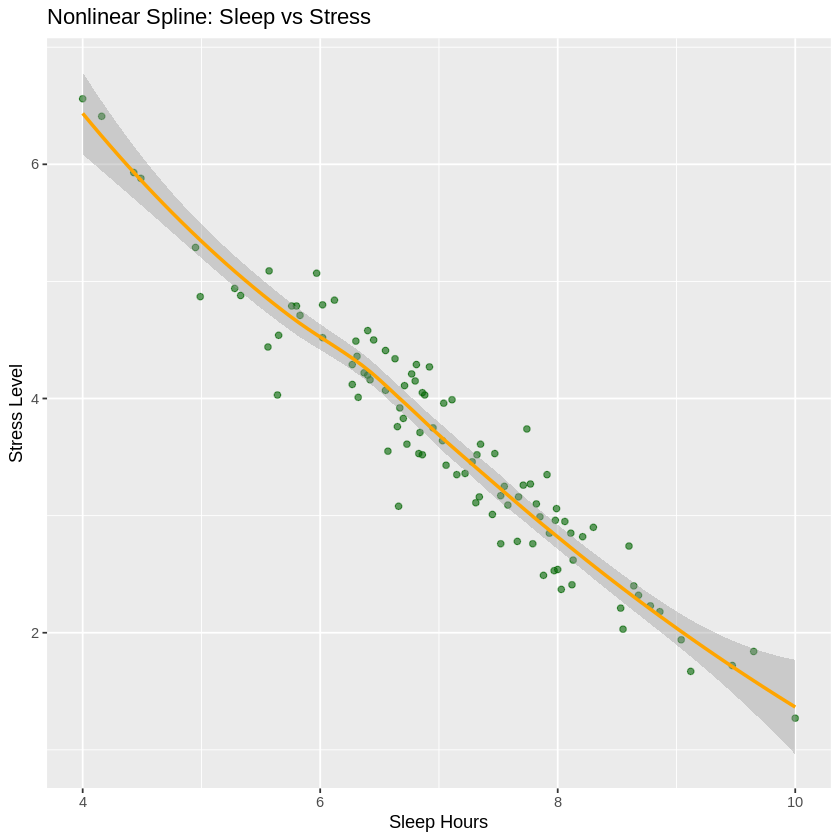

In [11]:

# Scatter + linear fit
ggplot(df, aes(x = Sleep, y = Stress)) +
  geom_point(color="steelblue", alpha=0.6) +
  geom_smooth(method = "lm", se=TRUE, color="red") +
  labs(title="Sleep Hours vs Stress",
       x="Sleep Hours (per night)",
       y="Stress Level (1-10)")

# Scatter + spline (nonlinear)
ggplot(df, aes(x = Sleep, y = Stress)) +
  geom_point(color="darkgreen", alpha=0.6) +
  geom_smooth(method = "loess", se=TRUE, color="orange") +
  labs(title="Nonlinear Spline: Sleep vs Stress",
       x="Sleep Hours",
       y="Stress Level")


## 🔹 3. Modeling the Relationship

Linear Regression

In [12]:
lm_model <- lm(Stress ~ Sleep, data=df)
summary(lm_model)



Call:
lm(formula = Stress ~ Sleep, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89422 -0.21055  0.01967  0.21364  0.66985 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.54935    0.17856   53.48   <2e-16 ***
Sleep       -0.83711    0.02492  -33.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2924 on 98 degrees of freedom
Multiple R-squared:  0.9201,	Adjusted R-squared:  0.9193 
F-statistic:  1128 on 1 and 98 DF,  p-value: < 2.2e-16


Interpretation: For each additional hour of sleep, how much does stress decrease?

## Nonlinear (Spline Regression)

In [13]:
install.packages("splines")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘splines’ is a base package, and should not be updated”


In [14]:
library(splines)


In [15]:
spline_model <- lm(Stress ~ ns(Sleep, df=3), data=df)
summary(spline_model)


Call:
lm(formula = Stress ~ ns(Sleep, df = 3), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88799 -0.21231  0.02025  0.21979  0.69077 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          6.2413     0.1523   40.99   <2e-16 ***
ns(Sleep, df = 3)1  -2.8729     0.1270  -22.62   <2e-16 ***
ns(Sleep, df = 3)2  -5.9351     0.3474  -17.09   <2e-16 ***
ns(Sleep, df = 3)3  -4.0140     0.1793  -22.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2944 on 96 degrees of freedom
Multiple R-squared:  0.9206,	Adjusted R-squared:  0.9182 
F-statistic: 371.2 on 3 and 96 DF,  p-value: < 2.2e-16


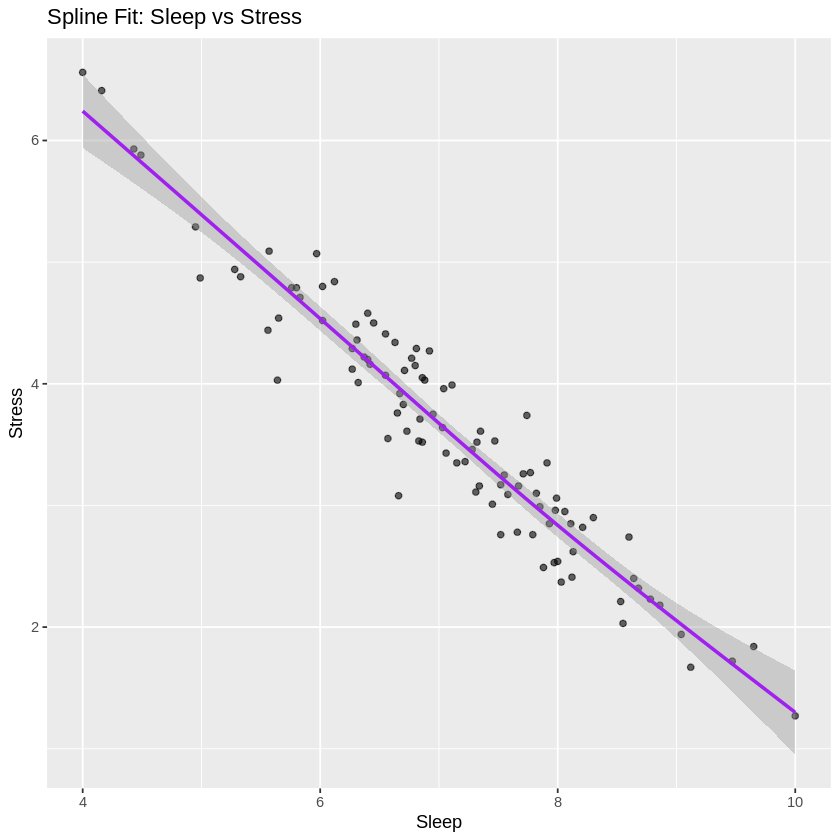

In [16]:
# Visualize fitted line
ggplot(df, aes(Sleep, Stress)) +
  geom_point(alpha=0.6) +
  stat_smooth(method="lm", formula=y~ns(x, df=3), se=TRUE, color="purple") +
  labs(title="Spline Fit: Sleep vs Stress")

This tests whether there’s a “sweet spot” for sleep (e.g., stress doesn’t keep dropping forever).

🔹 4. Project Goals You Can Already Address

✅ Micro vs Macro: Micro = individual sleep–stress pairs. Macro = summarize stress distribution across all sleep ranges.

✅ Nonlinear truths: Use splines/loess to test whether stress declines differently at low vs. high sleep.

✅ Fairness snack: If you add subgroups later (e.g., age, gender), you can check calibration (does the sleep–stress link look the same across groups?).

✅ Geography overlays: Not in this dataset, but you can imagine merging with population health datasets (CDC, Census).

✅ Screen time extension: This dataset is a perfect sandbox to build your methods (splines, fairness checks). Then you can replicate the workflow on a richer dataset (like Kaggle’s Digital Habits dataset).

## 🔹 5. Extra Analysis Ideas

Threshold detection: Use change-point detection or segmented regression to find the “turning point” in sleep hours where stress drops most.

Visualization: Boxplots of stress grouped by sleep categories (e.g., <6 hrs, 6–8 hrs, >8 hrs).

Predictive modeling: Train/test split; predict stress from sleep, check RMSE.

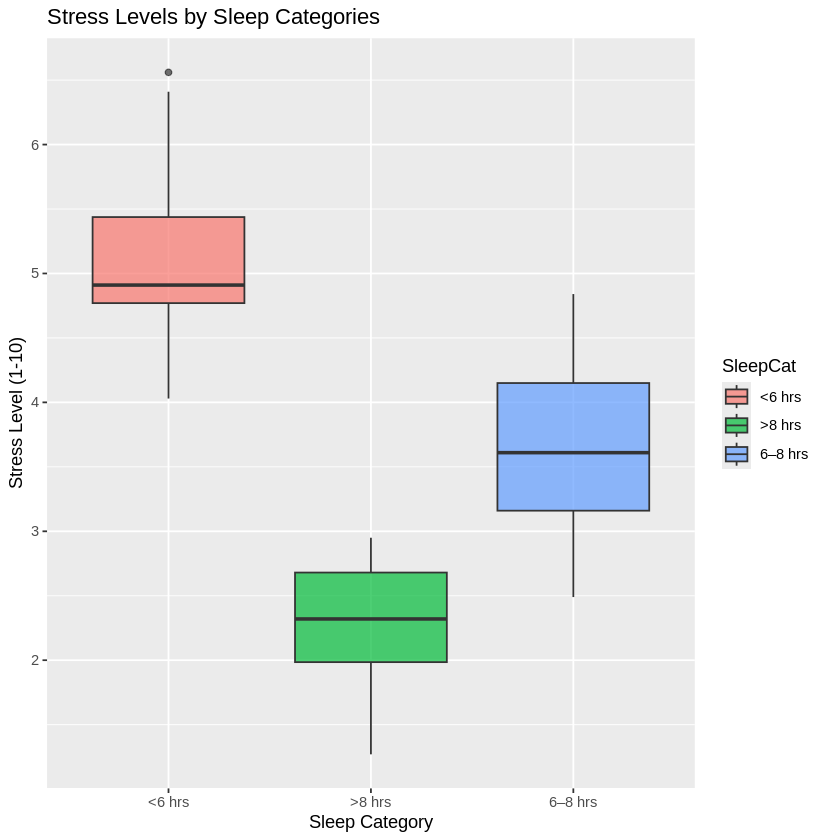

In [17]:
df <- df %>%
  mutate(SleepCat = case_when(
    Sleep < 6 ~ "<6 hrs",
    Sleep >= 6 & Sleep <= 8 ~ "6–8 hrs",
    TRUE ~ ">8 hrs"
  ))

ggplot(df, aes(x=SleepCat, y=Stress, fill=SleepCat)) +
  geom_boxplot(alpha=0.7) +
  labs(title="Stress Levels by Sleep Categories",
       x="Sleep Category", y="Stress Level (1-10)")


## 6. Basic EDA & Descriptives

Distribution of Sleep Hours (histogram, density plot).

Distribution of Stress Levels.

Compare summary stats (mean, SD, median, quartiles).

Identify outliers (e.g., someone who sleeps 3 hrs but reports stress = 1).

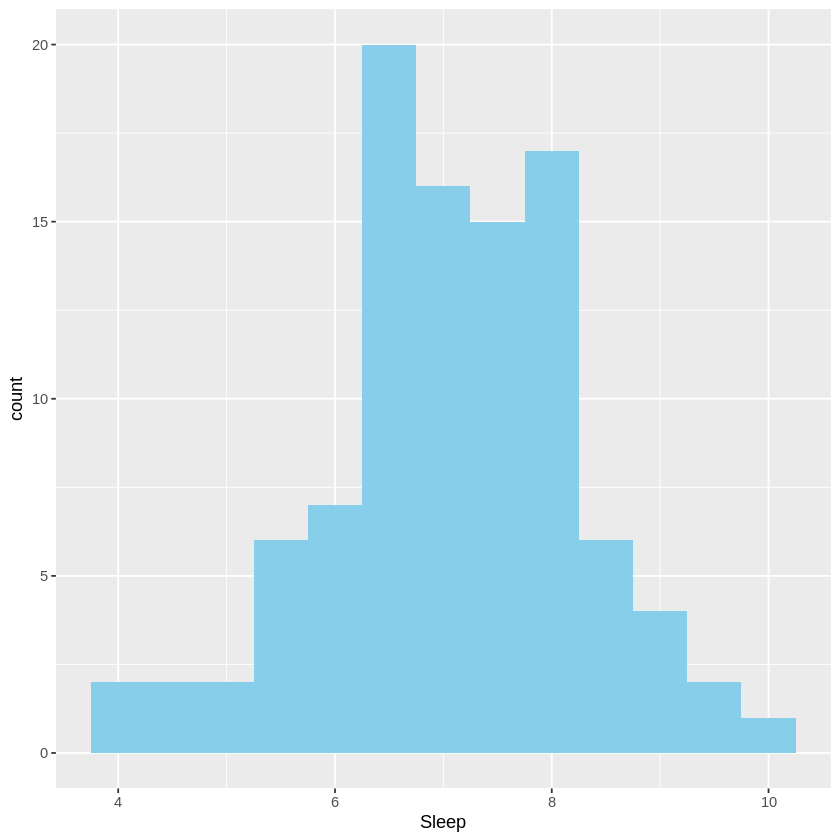

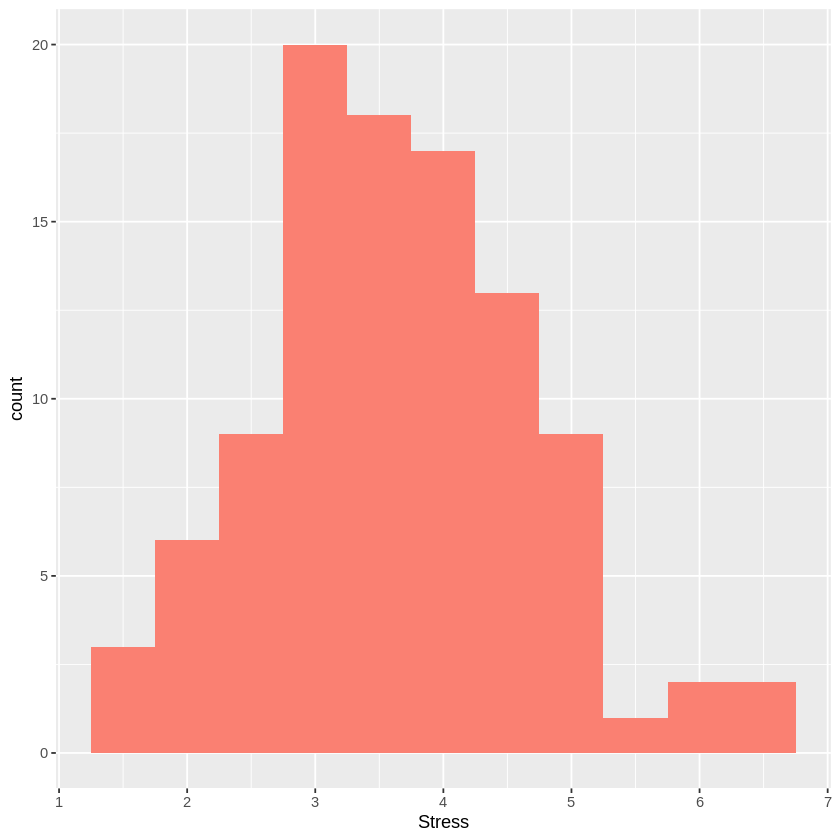

In [18]:
ggplot(df, aes(x=Sleep)) + geom_histogram(binwidth=0.5, fill="skyblue")
ggplot(df, aes(x=Stress)) + geom_histogram(binwidth=0.5, fill="salmon")


## T Test

You will need Binary Grouping for this part. To compare stress levels for people who sleep less or more than 7 hours.

In [20]:
# Create binary group
df <- df %>%
  mutate(SleepGroup = ifelse(Sleep < 7, "<7 hrs", "≥7 hrs"))

# Independent samples t-test
t_test_result <- t.test(Stress ~ SleepGroup, data = df)
t_test_result



	Welch Two Sample t-test

data:  Stress by SleepGroup
t = 11.998, df = 94.35, p-value < 2.2e-16
alternative hypothesis: true difference in means between group <7 hrs and group ≥7 hrs is not equal to 0
95 percent confidence interval:
 1.319965 1.843468
sample estimates:
mean in group <7 hrs mean in group ≥7 hrs 
            4.438776             2.857059 


Interpretation:
The p value appears to be very small < 0.05, which means there is a significant difference between short sleepers and normal sleepers. The estimate gives mean difference in stress.

## ANOVA Test

We can use 3 categories (< 6 hours, 6-8 hours, > 8 hours)


In [21]:
# Categorize sleep
df <- df %>%
  mutate(SleepCat = case_when(
    Sleep < 6 ~ "<6 hrs",
    Sleep >= 6 & Sleep <= 8 ~ "6–8 hrs",
    TRUE ~ ">8 hrs"
  ))

# One-way ANOVA
anova_model <- aov(Stress ~ SleepCat, data = df)
summary(anova_model)

# Post-hoc (which groups differ?)
TukeyHSD(anova_model)


            Df Sum Sq Mean Sq F value Pr(>F)    
SleepCat     2  70.68   35.34   100.4 <2e-16 ***
Residuals   97  34.14    0.35                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Stress ~ SleepCat, data = df)

$SleepCat
                    diff       lwr       upr p adj
>8 hrs-<6 hrs  -2.850855 -3.329961 -2.371749     0
6–8 hrs-<6 hrs -1.484596 -1.878654 -1.090538     0
6–8 hrs->8 hrs  1.366259  0.998011  1.734507     0


## Chi-Square Test

Both variables are continuous, so we categorize stress from Low vs. High, and make it categorical x categorical.

In [22]:
# Bin stress: Low (≤5), High (>5)
df <- df %>%
  mutate(StressCat = ifelse(Stress <= 5, "Low", "High"))

# Contingency table
tab <- table(df$SleepCat, df$StressCat)
tab

# Chi-square test
chisq.test(tab)


         
          High Low
  <6 hrs     7   9
  >8 hrs     0  19
  6–8 hrs    0  65

Warning message in stats::chisq.test(x, y, ...):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 39.516, df = 2, p-value = 2.625e-09


Since the p-value is less than 0.05, the sleep and stress category are not independent (they're associated). The residuals tell you which contribute the most to the chi-square statistic.